In [1]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.nn.functional as F

#Define transformations
transform = transforms.Compose([transforms.ToTensor()])

#Load training data
train_dataset=torchvision.datasets.FashionMNIST(
    root='/data',train=True,download=True,transform=transform
)

#Load testing data
test_dataset=torchvision.datasets.FashionMNIST(
    root='/data',train=False,download=True,transform=transform
)
print("FashionMNIST dataset loaded successfully!")

train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=1,shuffle=False)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)



class MLP_NoDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
class MLP_WithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)


class MLP_Dropout_WeightDecay(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)






100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.6MB/s]

FashionMNIST dataset loaded successfully!


In [2]:
def train_and_evaluate(model, train_loader, test_loader, epochs=10, weight_decay=0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=weight_decay)


    loss_fn = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                pred = model(X)
                loss = loss_fn(pred, y)
                total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Test Loss = {avg_test_loss:.4f}")

    return train_losses, test_losses

In [3]:

def plot_losses(t1, v1, t2, v2, t3, v3,t4, v4):
    epochs = range(1, len(t1) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, t1, 'b-', label='Train (No Reg)')
    plt.plot(epochs, v1, 'b--', label='Test (No Reg)')
    plt.plot(epochs, t2, 'g-', label='Train (Dropout)')
    plt.plot(epochs, v2, 'g--', label='Test (Dropout)')
    plt.plot(epochs, t3, 'r-', label='Train (Weight Decay)')
    plt.plot(epochs, v3, 'r--', label='Test (Weight Decay)')
    plt.plot(epochs, t4, 'm-', label='Train (Dropout + WD)')
    plt.plot(epochs, v4, 'm--', label='Test (Dropout + WD)')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Regularization: Dropout vs Weight Decay vs Both")
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1: Train Loss = 0.5379, Test Loss = 0.4698
Epoch 2: Train Loss = 0.4014, Test Loss = 0.4120
Epoch 3: Train Loss = 0.3625, Test Loss = 0.4035
Epoch 4: Train Loss = 0.3399, Test Loss = 0.3947
Epoch 5: Train Loss = 0.3237, Test Loss = 0.4130
Epoch 6: Train Loss = 0.3106, Test Loss = 0.3752
Epoch 7: Train Loss = 0.3000, Test Loss = 0.3725
Epoch 8: Train Loss = 0.2901, Test Loss = 0.3678
Epoch 9: Train Loss = 0.2797, Test Loss = 0.3754
Epoch 10: Train Loss = 0.2755, Test Loss = 0.3810
Epoch 1: Train Loss = 0.8772, Test Loss = 0.5803
Epoch 2: Train Loss = 0.7411, Test Loss = 0.5331
Epoch 3: Train Loss = 0.7002, Test Loss = 0.5371
Epoch 4: Train Loss = 0.6961, Test Loss = 0.5767
Epoch 5: Train Loss = 0.6823, Test Loss = 0.5172
Epoch 6: Train Loss = 0.6827, Test Loss = 0.5646
Epoch 7: Train Loss = 0.6808, Test Loss = 0.5277
Epoch 8: Train Loss = 0.6775, Test Loss = 0.5542
Epoch 9: Train Loss = 0.6672, Test Loss = 0.5551
Epoch 10: Train Loss = 0.6793, Test Loss = 0.5229
Epoch 1: Train Los

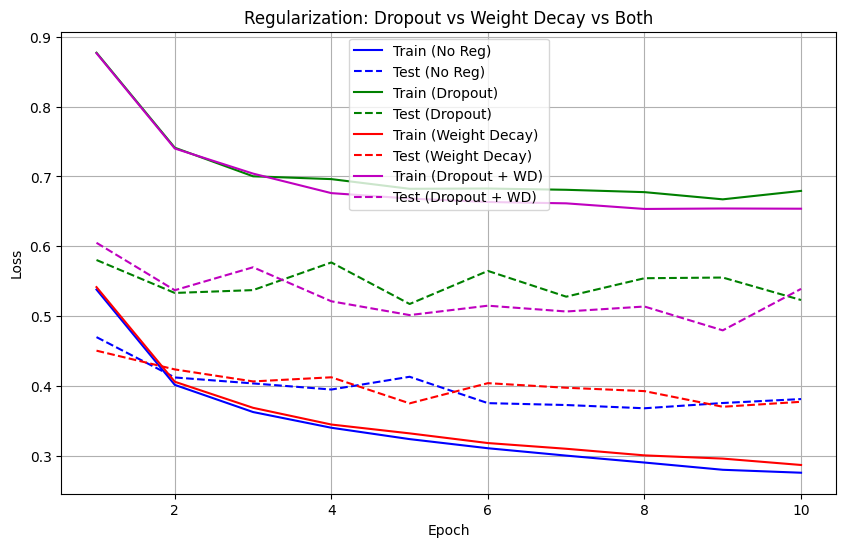

In [4]:
#No dropout, no weight decay
model1 = MLP_NoDropout()
train1, test1 = train_and_evaluate(model1, train_loader, test_loader, weight_decay=0.0)

#Dropout only
model2 = MLP_WithDropout()
train2, test2 = train_and_evaluate(model2, train_loader, test_loader, weight_decay=0.0)

#Weight decay only
model3 = MLP_NoDropout()
train3, test3 = train_and_evaluate(model3, train_loader, test_loader, weight_decay=1e-4)

# Dropout + Weight Decay
model4 = MLP_Dropout_WeightDecay()
train4, test4 = train_and_evaluate(model4, train_loader, test_loader, weight_decay=1e-4)

plot_losses(train1, test1, train2, test2, train3, test3, train4, test4)